### Calculating Calinski-Harabasz-Index to find optimal index for K-Means-Clustering:

**Main Dataset**

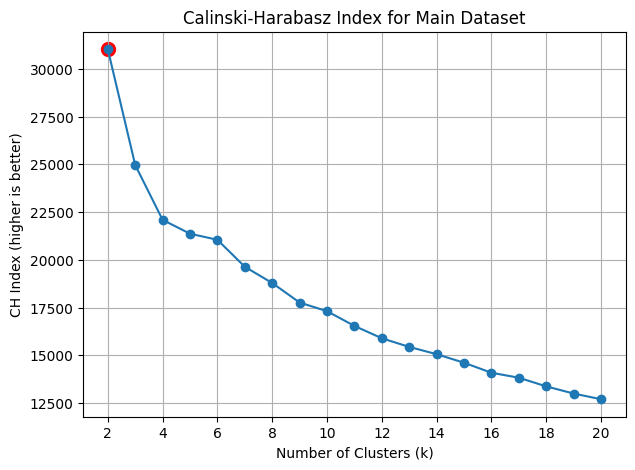

**2 Music Genres would not be sensical for this project, so as the optimal number of clusters for this scenario I choose: 6** 

In [1]:
from src.clustering_utils import evaluate_ch_index
import numpy as np
from IPython.display import display, Markdown

X_scaled = np.load("../data/processed_data/X_scaled.npy")
display(Markdown("### Calculating Calinski-Harabasz-Index to find optimal index for K-Means-Clustering:"))

display(Markdown("**Main Dataset**"))
_ = evaluate_ch_index(X_scaled, "Main Dataset", 2, 20)

display(Markdown("**2 Music Genres would not be sensical for this project, so as the optimal number of clusters for this scenario I choose: 6** "))

**Extended Dataset**

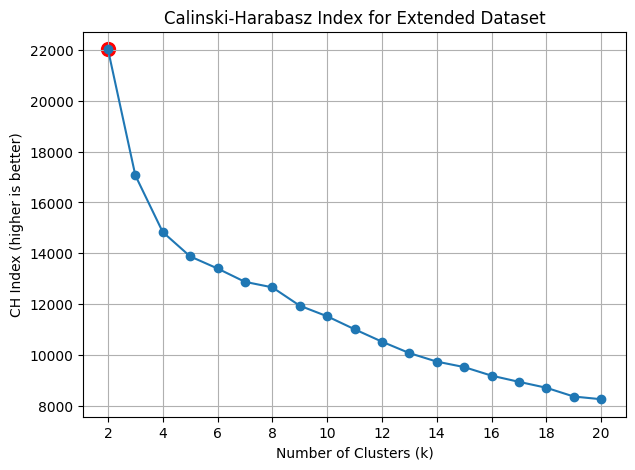

**2 Music Genres would not be sensical for this project, so as the optimal number of clusters for this scenario I choose: 8** 

In [2]:
from src.clustering_utils import evaluate_ch_index
import numpy as np
from IPython.display import display, Markdown

Y_scaled = np.load("../data/processed_data/Y_scaled.npy")
display(Markdown("**Extended Dataset**"))
_ = evaluate_ch_index(Y_scaled, "Extended Dataset", 2, 20)

display(Markdown("**2 Music Genres would not be sensical for this project, so as the optimal number of clusters for this scenario I choose: 8** "))

In [3]:
from sklearn.cluster import KMeans
from IPython.display import display, Markdown
import numpy as np
import joblib

display(Markdown("### Performing K-Means-Clustering on datasets:"))
display(Markdown("**Main Dataset with 6 clusters:**"))

X_scaled = np.load("../data/processed_data/X_scaled.npy")
optimal_k = 6
kmeans_main = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_main.fit(X_scaled)
joblib.dump(kmeans_main, "../models/kmeans_main.pkl")

labels_main = kmeans_main.labels_
display(Markdown(f"K-Means is sucessfully trained on main dataset with number of clusters k = {optimal_k} and saved"))

### Performing K-Means-Clustering on datasets:

**Main Dataset with 6 clusters:**

K-Means is sucessfully trained on main dataset with number of clusters k = 6 and saved

In [4]:
from sklearn.cluster import KMeans
from IPython.display import display, Markdown
import numpy as np
import joblib

display(Markdown("**Extended Dataset with 8 clusters:**"))

Y_scaled = np.load("../data/processed_data/Y_scaled.npy")
optimal_k = 8
kmeans_extended = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_extended.fit(Y_scaled)
joblib.dump(kmeans_extended, "../models/kmeans_extended.pkl")

labels_extended = kmeans_extended.labels_
display(Markdown(f"K-Means is sucessfully trained on extended dataset with number of clusters k = {optimal_k} and saved"))

**Extended Dataset with 8 clusters:**

K-Means is sucessfully trained on extended dataset with number of clusters k = 8 and saved

In [6]:
import pandas as pd
from IPython.display import display, Markdown

df = pd.read_csv("../data/processed_data/spotify_clean.csv")
df["cluster_main"] = labels_main
df["cluster_extended"] = labels_extended

df.to_csv("../data/processed_data/spotify_clustered.csv", index=False)
display(Markdown("### Clustering labels for main and extended dataset added to the original dataset and saved:  "))
display(Markdown("***First 5 rows of the original dataset with added clustering labels:***"))
display(df.head(5))

### Clustering labels for main and extended dataset added to the original dataset and saved:  

***First 5 rows of the original dataset with added clustering labels:***

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster_main,cluster_extended
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2,2
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,5,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,5,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,5,4
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,5,4
